# Tutorial 1: State Transfer
This tutorial will use the example of qubit state transfer to cover the basics of this Quantum Optimal Control package. We will be using the GRadient Ascent Pulse Engineering (GRAPE) algorithm to effect state transfer from the ground state to the excited state. 
$\newcommand{\bracket}[2]{\left\langle{#1}|{#2}\right\rangle}$

For an introduction to Quantum Optimal Control: https://qutip.org/docs/latest/guide/guide-control.html

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import rfft, rfftfreq

In [2]:
from qocag.models.close_system.optimization import grape_schroedinger_discrete
from qocag.costs.targetstateinfidelity import TargetStateInfidelity
from qocag.optimizers.adam import Adam
from qocag import generate_save_file_path

 C:\Users\seanp\anaconda3\lib\site-packages\qutip\__init__.py: 93

## Optimization Set-up

In [3]:
total_time = 10  # pulse duration in ns
total_time_steps = 300  # number of discretized time steps
times = np.linspace(0, total_time, total_time_steps)

In [4]:
initial_state = np.array([1, 0])  # |0>
target_state = np.array([0, 1])  # |1>

In [5]:
# generates a path to a h5 file to store optimization data. creates output directory if it does not already exsit
save_file_path = generate_save_file_path("state_transfer", "./out")

### System Hamiltonian
For simplicity and ease of computation, we will work with natural units where $\hbar = 1$.

 $$\Large H =  \frac{1}{2}\omega_q\sigma_z+  u(t)\sigma_x$$

In [6]:
wq = 0.5 * 2 * np.pi  # qubit angular frequency in units of 1/ns

H0 = 0.5 * wq * np.array([[1, 0], [0, -1]])
h_controls = [np.array([[0, 1], [1, 0]])]  # list of control operators 

### Cost Function

In [7]:
from qocag import TargetStateInfidelity

We difine the cost function to be minimized by the control pulse. The form of the cost function will influence the location of the minima and thus the shape of the optimized pulse. Since it is our goal to achieve a high fidelity state, the most simple cost function contains only the TargetStateInfidelity cost contribution, which depends on the fidelity($\mathcal{F}$) of the evolved state.
$$\large C = 1-\mathcal{F}$$
$$\large\mathcal{F} = \bracket{\psi_{target}}{\psi_{actual}} $$

In [8]:
costs = [TargetStateInfidelity(target_state)]

### Initial Pulse

We must feed the optimizer an initial guess pulse to be optimized. The optimized pulse tends to maintain features of the guess pulse. For instance, if the guess is of high frequency (ex. random list of +1 and -1), the optimized pulse will also have high frequency components.

Generating high frequency signals in the lab can be challenging, so we will chose a flat pulse for our initial guess. To not show bais towards positive or negative amplitudes, it would be logical to have the pulse lie flat at 0. However, this pulse is a minimum of the cost function, so we instead choose a flat pulse which deviates slighly from 0: 

In [9]:
initial_pulse1 = [0.0001 * np.full(total_time_steps, 1)]  # the initial guess pulse to be optimized

### Run GRAPE Optimizer

In [10]:
result = grape_schroedinger_discrete(
    total_time_steps,
    costs,
    total_time,
    H0,
    h_controls,
    initial_state,
    initial_controls=initial_pulse1,
    save_file_path=save_file_path,
)

iter   |   total error  |       cost0      |   grads_l2  
  1    | 1.00000000e+00 |  1.00000000e+00  |  1.65365532e-12  
Iteration: 1
  2    | 1.00000000e+00 |  1.00000000e+00  |  5.50725114e-08  
Iteration: 2
  3    | 9.99999129e-01 |  9.99999129e-01  |  7.61690499e-04  
Iteration: 3
  4    | 9.99975014e-01 |  9.99975014e-01  |  4.07941174e-03  
Iteration: 4
  5    | 9.99914511e-01 |  9.99914511e-01  |  7.54559616e-03  
Iteration: 5
  6    | 9.99803487e-01 |  9.99803487e-01  |  1.14395352e-02  
Iteration: 6
  7    | 9.99633408e-01 |  9.99633408e-01  |  1.56231052e-02  
Iteration: 7
  8    | 9.99397406e-01 |  9.99397406e-01  |  2.00279820e-02  
Iteration: 8
  9    | 9.99089502e-01 |  9.99089502e-01  |  2.46148437e-02  
Iteration: 9
  10   | 9.98704272e-01 |  9.98704272e-01  |  2.93582779e-02  
Iteration: 10
  11   | 9.98236665e-01 |  9.98236665e-01  |  3.42404294e-02  
Iteration: 11
  12   | 9.97681902e-01 |  9.97681902e-01  |  3.92479245e-02  
Iteration: 12
  13   | 9.97035416e-01 |  

 106   | 4.09006953e-01 |  4.09006953e-01  |  4.00834665e-01  
Iteration: 106
 107   | 4.00396450e-01 |  4.00396450e-01  |  3.99461930e-01  
Iteration: 107
 108   | 3.91858240e-01 |  3.91858240e-01  |  3.97973741e-01  
Iteration: 108
 109   | 3.83395418e-01 |  3.83395418e-01  |  3.96372529e-01  
Iteration: 109
 110   | 3.75010967e-01 |  3.75010967e-01  |  3.94660787e-01  
Iteration: 110
 111   | 3.66707755e-01 |  3.66707755e-01  |  3.92841073e-01  
Iteration: 111
 112   | 3.58488534e-01 |  3.58488534e-01  |  3.90916000e-01  
Iteration: 112
 113   | 3.50355936e-01 |  3.50355936e-01  |  3.88888235e-01  
Iteration: 113
 114   | 3.42312475e-01 |  3.42312475e-01  |  3.86760494e-01  
Iteration: 114
 115   | 3.34360544e-01 |  3.34360544e-01  |  3.84535537e-01  
Iteration: 115
 116   | 3.26502413e-01 |  3.26502413e-01  |  3.82216167e-01  
Iteration: 116
 117   | 3.18740231e-01 |  3.18740231e-01  |  3.79805220e-01  
Iteration: 117
 118   | 3.11076026e-01 |  3.11076026e-01  |  3.77305568e-01  
I

 212   | 1.00065534e-02 |  1.00065534e-02  |  8.09421915e-02  
Iteration: 212
 213   | 9.54282688e-03 |  9.54282688e-03  |  7.90624602e-02  
Iteration: 213
 214   | 9.09873637e-03 |  9.09873637e-03  |  7.72177744e-02  
Iteration: 214
 215   | 8.67354910e-03 |  8.67354910e-03  |  7.54077693e-02  
Iteration: 215
 216   | 8.26655439e-03 |  8.26655439e-03  |  7.36320726e-02  
Iteration: 216
 217   | 7.87706333e-03 |  7.87706333e-03  |  7.18903047e-02  
Iteration: 217
 218   | 7.50440837e-03 |  7.50440837e-03  |  7.01820796e-02  
Iteration: 218
 219   | 7.14794291e-03 |  7.14794291e-03  |  6.85070052e-02  
Iteration: 219
 220   | 6.80704089e-03 |  6.80704089e-03  |  6.68646842e-02  
Iteration: 220
 221   | 6.48109635e-03 |  6.48109635e-03  |  6.52547144e-02  
Iteration: 221
 222   | 6.16952304e-03 |  6.16952304e-03  |  6.36766893e-02  
Iteration: 222
 223   | 5.87175394e-03 |  5.87175394e-03  |  6.21301988e-02  
Iteration: 223
 224   | 5.58724086e-03 |  5.58724086e-03  |  6.06148292e-02  
I

 318   | 2.14045367e-05 |  2.14045367e-05  |  3.76288972e-03  
Iteration: 318
 319   | 1.99723943e-05 |  1.99723943e-05  |  3.63482732e-03  
Iteration: 319
 320   | 1.86317532e-05 |  1.86317532e-05  |  3.51071589e-03  
Iteration: 320
 321   | 1.73770563e-05 |  1.73770563e-05  |  3.39044727e-03  
Iteration: 321
 322   | 1.62030649e-05 |  1.62030649e-05  |  3.27391582e-03  
Iteration: 322
 323   | 1.51048424e-05 |  1.51048424e-05  |  3.16101838e-03  
Iteration: 323
 324   | 1.40777376e-05 |  1.40777376e-05  |  3.05165423e-03  
Iteration: 324
 325   | 1.31173692e-05 |  1.31173692e-05  |  2.94572501e-03  
Iteration: 325
 326   | 1.22196114e-05 |  1.22196114e-05  |  2.84313473e-03  
Iteration: 326
 327   | 1.13805795e-05 |  1.13805795e-05  |  2.74378968e-03  
Iteration: 327
 328   | 1.05966170e-05 |  1.05966170e-05  |  2.64759842e-03  
Iteration: 328
 329   | 9.86428298e-06 |  9.86428298e-06  |  2.55447171e-03  
Iteration: 329
 330   | 9.18034000e-06 |  9.18034000e-06  |  2.46432250e-03  
I

 424   | 2.84061463e-09 |  2.84061463e-09  |  4.33481969e-05  
Iteration: 424
 425   | 2.55891752e-09 |  2.55891752e-09  |  4.11427615e-05  
Iteration: 425
 426   | 2.30389596e-09 |  2.30389596e-09  |  3.90388458e-05  
Iteration: 426
 427   | 2.07313078e-09 |  2.07313078e-09  |  3.70322157e-05  
Iteration: 427
 428   | 1.86444038e-09 |  1.86444038e-09  |  3.51187962e-05  
Iteration: 428
 429   | 1.67577663e-09 |  1.67577663e-09  |  3.32946663e-05  
Iteration: 429
 430   | 1.50533630e-09 |  1.50533630e-09  |  3.15560535e-05  
Iteration: 430
 431   | 1.35142586e-09 |  1.35142586e-09  |  2.98993292e-05  
Iteration: 431
 432   | 1.21251809e-09 |  1.21251809e-09  |  2.83210034e-05  
Iteration: 432
 433   | 1.08721321e-09 |  1.08721321e-09  |  2.68177202e-05  
Iteration: 433
 434   | 9.74244685e-10 |  9.74244685e-10  |  2.53862532e-05  
Iteration: 434
 435   | 8.72450112e-10 |  8.72450112e-10  |  2.40235011e-05  
Iteration: 435
 436   | 7.80783660e-10 |  7.80783660e-10  |  2.27264831e-05  
I

In [11]:
optimized_pulse1, infidelity1 = result.best_controls, result.best_error
print(infidelity1)

-1.5543122344752192e-15


Do not be alarmed by the negative infidelity. This is an issue of machine precision and we can take the infidelity to be zero.

### Optimized Result

In [12]:
def plot_pulses(times, guess_pulse, optimized_pulse):
    plt.xlabel("time (ns)")
    plt.ylabel("u(t)")
    plt.step(times, optimized_pulse, label="optimized", color="r")
    plt.step(times, guess_pulse, label="guess", color="b")
    plt.legend()
    plt.show()

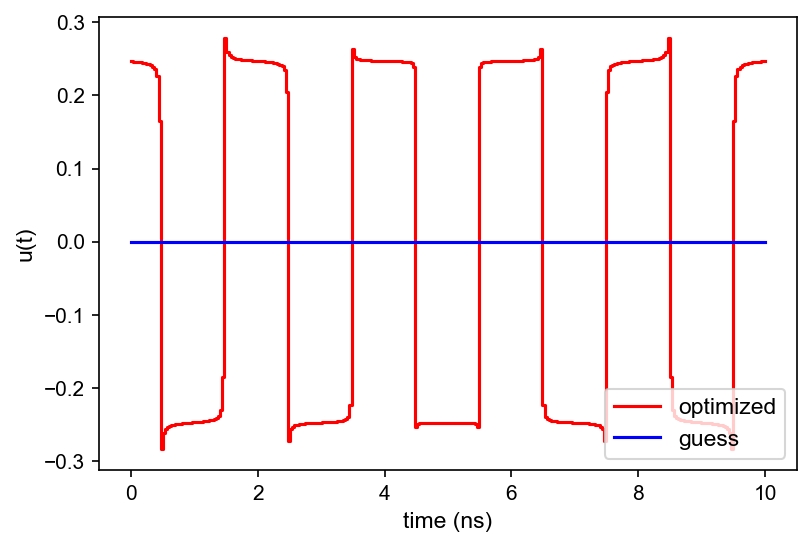

In [13]:
plot_pulses(times, initial_pulse1[0], optimized_pulse1[0])

# Smoothing the Control Pulse
This pulse above has problematic "kinks" around the maxima. These kinks can be removed with a more informed choice of cost function. We will explore two cost contributions to try to smooth this pulse. 

### Control Variation
This cost contribution will penalize high variance between adjacent control amplitudes.

In [14]:
from qocag import ControlVariation

 $$\large C = 1-\mathcal{F} + \alpha C_{2}$$
$$\Large C_{2} = \sum\limits_{j}|u_j-u_{j+1}| $$


We have the freedom to choose the cost multiplier($\alpha$).The buisness of setting hyperparameters can be tedious, especially when there are several cost contributions to balance. 

In [15]:
initial_pulse2 = optimized_pulse1

Instead of starting from a flat pulse like before, we can choose to start from the high fidelity, optimized pulse we just generated. The minimum of this new cost function should be "nearby" the minimum of the old cost function we found (or atleast closer than the flat pulse).

In [16]:
costs = [
    TargetStateInfidelity(target_state),
    ControlVariation(1, total_time_steps, cost_multiplier=0.001, order=1),
]

result = grape_schroedinger_discrete(
    total_time_steps,
    costs,
    total_time,
    H0,
    h_controls,
    initial_state,
    initial_controls=initial_pulse2,
    save_file_path=save_file_path,
)

iter   |   total error  |       cost0      |       cost1      |   grads_l2  
  1    | 2.38912142e-03 |  -1.55431223e-15  |  2.38912142e-03  |  4.23901022e-03  
Iteration: 1
  2    | 2.38037852e-03 |  1.16935122e-05  |  2.36868500e-03  |  4.64874685e-03  
Iteration: 2
  3    | 2.35055350e-03 |  8.14163364e-07  |  2.34973934e-03  |  4.21065923e-03  
Iteration: 3
  4    | 2.33371865e-03 |  2.92046414e-06  |  2.33079819e-03  |  4.33207544e-03  
Iteration: 4
  5    | 2.31783096e-03 |  6.27694576e-06  |  2.31155402e-03  |  4.38088262e-03  
Iteration: 5
  6    | 2.29612130e-03 |  3.89975802e-06  |  2.29222154e-03  |  4.25991293e-03  
Iteration: 6
  7    | 2.27393899e-03 |  1.02977515e-06  |  2.27290921e-03  |  4.15090050e-03  
Iteration: 7
  8    | 2.25399610e-03 |  3.24991928e-07  |  2.25367111e-03  |  4.09112532e-03  
Iteration: 8
  9    | 2.23646871e-03 |  1.88599933e-06  |  2.23458271e-03  |  4.10093839e-03  
Iteration: 9
  10   | 2.21937788e-03 |  3.64936851e-06  |  2.21572851e-03  |  4.

  85   | 1.14338820e-03 |  1.31835458e-08  |  1.14337501e-03  |  2.56683099e-03  
Iteration: 85
  86   | 1.13308313e-03 |  7.66906916e-09  |  1.13307546e-03  |  2.55158100e-03  
Iteration: 86
  87   | 1.12286975e-03 |  5.03356756e-09  |  1.12286472e-03  |  2.53584670e-03  
Iteration: 87
  88   | 1.11274679e-03 |  5.05693554e-09  |  1.11274173e-03  |  2.52006553e-03  
Iteration: 88
  89   | 1.10271250e-03 |  4.97200814e-09  |  1.10270752e-03  |  2.50498816e-03  
Iteration: 89
  90   | 1.09276703e-03 |  6.13107409e-09  |  1.09276090e-03  |  2.49020713e-03  
Iteration: 90
  91   | 1.08291052e-03 |  9.77608894e-09  |  1.08290074e-03  |  2.47498666e-03  
Iteration: 91
  92   | 1.07314249e-03 |  1.32359929e-08  |  1.07312926e-03  |  2.45977564e-03  
Iteration: 92
  93   | 1.06346137e-03 |  1.29936905e-08  |  1.06344837e-03  |  2.44502902e-03  
Iteration: 93
  94   | 1.05386665e-03 |  1.05830739e-08  |  1.05385607e-03  |  2.43022811e-03  
Iteration: 94
  95   | 1.04435824e-03 |  8.56278171e-0

 170   | 5.38615695e-04 |  1.18682090e-08  |  5.38603827e-04  |  1.47917597e-03  
Iteration: 170
 171   | 5.34159850e-04 |  1.19044598e-08  |  5.34147945e-04  |  1.46891521e-03  
Iteration: 171
 172   | 5.29752583e-04 |  1.20217373e-08  |  5.29740561e-04  |  1.45869862e-03  
Iteration: 172
 173   | 5.25393482e-04 |  1.21402738e-08  |  5.25381342e-04  |  1.44853500e-03  
Iteration: 173
 174   | 5.21082134e-04 |  1.21792275e-08  |  5.21069955e-04  |  1.43843462e-03  
Iteration: 174
 175   | 5.16818130e-04 |  1.22161335e-08  |  5.16805914e-04  |  1.42837340e-03  
Iteration: 175
 176   | 5.12601063e-04 |  1.22349481e-08  |  5.12588828e-04  |  1.41836236e-03  
Iteration: 176
 177   | 5.08430527e-04 |  1.22218559e-08  |  5.08418305e-04  |  1.40841626e-03  
Iteration: 177
 178   | 5.04306117e-04 |  1.22751088e-08  |  5.04293842e-04  |  1.39851677e-03  
Iteration: 178
 179   | 5.00227434e-04 |  1.23646536e-08  |  5.00215069e-04  |  1.38867224e-03  
Iteration: 179
 180   | 4.96194077e-04 |  1.2

 255   | 2.96676452e-04 |  1.57252433e-08  |  2.96660727e-04  |  7.84292905e-04  
Iteration: 255
 256   | 2.95080175e-04 |  1.57602311e-08  |  2.95064415e-04  |  7.78078940e-04  
Iteration: 256
 257   | 2.93504806e-04 |  1.57971025e-08  |  2.93489009e-04  |  7.71905870e-04  
Iteration: 257
 258   | 2.91950106e-04 |  1.58328750e-08  |  2.91934274e-04  |  7.65774058e-04  
Iteration: 258
 259   | 2.90415843e-04 |  1.58687150e-08  |  2.90399974e-04  |  7.59682833e-04  
Iteration: 259
 260   | 2.88901783e-04 |  1.59037674e-08  |  2.88885879e-04  |  7.53632094e-04  
Iteration: 260
 261   | 2.87407696e-04 |  1.59374176e-08  |  2.87391758e-04  |  7.47621888e-04  
Iteration: 261
 262   | 2.85933352e-04 |  1.59719273e-08  |  2.85917380e-04  |  7.41651743e-04  
Iteration: 262
 263   | 2.84478526e-04 |  1.60055533e-08  |  2.84462520e-04  |  7.35722055e-04  
Iteration: 263
 264   | 2.83042991e-04 |  1.60402227e-08  |  2.83026951e-04  |  7.29832245e-04  
Iteration: 264
 265   | 2.81626526e-04 |  1.6

 340   | 2.16000092e-04 |  1.63408381e-08  |  2.15983752e-04  |  3.87344606e-04  
Iteration: 340
 341   | 2.15515088e-04 |  2.06111966e-08  |  2.15494476e-04  |  3.83269611e-04  
Iteration: 341
 342   | 2.15037290e-04 |  1.40783476e-08  |  2.15023212e-04  |  3.81679706e-04  
Iteration: 342
 343   | 2.14566920e-04 |  2.61543363e-08  |  2.14540766e-04  |  3.76760142e-04  
Iteration: 343
 344   | 2.14104761e-04 |  9.53563140e-09  |  2.14095226e-04  |  3.79365748e-04  
Iteration: 344
 345   | 2.13653299e-04 |  4.70868678e-08  |  2.13606212e-04  |  3.75099264e-04  
Iteration: 345
 346   | 2.13219521e-04 |  1.14318406e-08  |  2.13208089e-04  |  3.97360066e-04  
Iteration: 346
 347   | 2.12824205e-04 |  1.49331820e-07  |  2.12674873e-04  |  4.17805733e-04  
Iteration: 347
 348   | 2.12515175e-04 |  1.30056322e-07  |  2.12385119e-04  |  5.29220465e-04  
Iteration: 348
 349   | 2.12400101e-04 |  6.85283443e-07  |  2.11714818e-04  |  6.72578187e-04  
Iteration: 349
 350   | 2.12427243e-04 |  7.8

 425   | 1.92512054e-04 |  2.03739080e-08  |  1.92491680e-04  |  1.89408082e-04  
Iteration: 425
 426   | 1.92369696e-04 |  2.14424208e-08  |  1.92348254e-04  |  1.87941148e-04  
Iteration: 426
 427   | 1.92229305e-04 |  1.50497371e-08  |  1.92214255e-04  |  1.87852035e-04  
Iteration: 427
 428   | 1.92090284e-04 |  2.09188363e-08  |  1.92069365e-04  |  1.85077944e-04  
Iteration: 428
 429   | 1.91953255e-04 |  2.02755400e-08  |  1.91932979e-04  |  1.83691433e-04  
Iteration: 429
 430   | 1.91818219e-04 |  1.55848324e-08  |  1.91802634e-04  |  1.83384237e-04  
Iteration: 430
 431   | 1.91684606e-04 |  2.12608391e-08  |  1.91663345e-04  |  1.80916050e-04  
Iteration: 431
 432   | 1.91552710e-04 |  1.92552847e-08  |  1.91533454e-04  |  1.79635867e-04  
Iteration: 432
 433   | 1.91422741e-04 |  1.61895037e-08  |  1.91406551e-04  |  1.79028192e-04  
Iteration: 433
 434   | 1.91294265e-04 |  2.13541935e-08  |  1.91272911e-04  |  1.76883309e-04  
Iteration: 434
 435   | 1.91167314e-04 |  1.8

 510   | 1.84871101e-04 |  1.79477931e-08  |  1.84853153e-04  |  1.10073987e-04  
Iteration: 510
 511   | 1.84816110e-04 |  1.80117273e-08  |  1.84798099e-04  |  1.09518502e-04  
Iteration: 511
 512   | 1.84761619e-04 |  1.78939213e-08  |  1.84743725e-04  |  1.08993455e-04  
Iteration: 512
 513   | 1.84707620e-04 |  1.79642089e-08  |  1.84689656e-04  |  1.08448915e-04  
Iteration: 513
 514   | 1.84654106e-04 |  1.79303913e-08  |  1.84636176e-04  |  1.07924327e-04  
Iteration: 514
 515   | 1.84601071e-04 |  1.78751983e-08  |  1.84583196e-04  |  1.07408634e-04  
Iteration: 515
 516   | 1.84548507e-04 |  1.79447700e-08  |  1.84530562e-04  |  1.06882159e-04  
Iteration: 516
 517   | 1.84496409e-04 |  1.78544691e-08  |  1.84478554e-04  |  1.06382619e-04  
Iteration: 517
 518   | 1.84444769e-04 |  1.78817589e-08  |  1.84426887e-04  |  1.05873020e-04  
Iteration: 518
 519   | 1.84393581e-04 |  1.78833807e-08  |  1.84375698e-04  |  1.05372405e-04  
Iteration: 519
 520   | 1.84342839e-04 |  1.7

 595   | 1.81467249e-04 |  1.69209361e-08  |  1.81450328e-04  |  7.89097539e-05  
Iteration: 595
 596   | 1.81438006e-04 |  1.69104292e-08  |  1.81421096e-04  |  7.86626512e-05  
Iteration: 596
 597   | 1.81408942e-04 |  1.68969522e-08  |  1.81392045e-04  |  7.84175396e-05  
Iteration: 597
 598   | 1.81380052e-04 |  1.68854070e-08  |  1.81363167e-04  |  7.81738841e-05  
Iteration: 598
 599   | 1.81351336e-04 |  1.68731750e-08  |  1.81334463e-04  |  7.79319347e-05  
Iteration: 599
 600   | 1.81322793e-04 |  1.68604769e-08  |  1.81305932e-04  |  7.76916369e-05  
Iteration: 600
 601   | 1.81294419e-04 |  1.68492748e-08  |  1.81277570e-04  |  7.74527682e-05  
Iteration: 601
 602   | 1.81266215e-04 |  1.68358755e-08  |  1.81249379e-04  |  7.72156803e-05  
Iteration: 602
 603   | 1.81238177e-04 |  1.68251043e-08  |  1.81221352e-04  |  7.69798588e-05  
Iteration: 603
 604   | 1.81210306e-04 |  1.68116557e-08  |  1.81193494e-04  |  7.67458232e-05  
Iteration: 604
 605   | 1.81182598e-04 |  1.6

 680   | 1.79679225e-04 |  1.09432009e-07  |  1.79569793e-04  |  3.66014599e-04  
Iteration: 680
 681   | 1.79865986e-04 |  5.59736029e-07  |  1.79306250e-04  |  5.17724949e-04  
Iteration: 681
 682   | 1.80184918e-04 |  5.56213504e-07  |  1.79628705e-04  |  7.03873629e-04  
Iteration: 682
 683   | 1.80527034e-04 |  1.35228144e-06  |  1.79174753e-04  |  8.55007955e-04  
Iteration: 683
 684   | 1.80497723e-04 |  8.62709444e-07  |  1.79635013e-04  |  8.53013059e-04  
Iteration: 684
 685   | 1.79904936e-04 |  6.90238022e-07  |  1.79214698e-04  |  5.84824940e-04  
Iteration: 685
 686   | 1.79393401e-04 |  3.01555891e-09  |  1.79390385e-04  |  1.23434034e-04  
Iteration: 686
 687   | 1.79564546e-04 |  1.17768126e-07  |  1.79446777e-04  |  3.75970521e-04  
Iteration: 687
 688   | 1.79936011e-04 |  7.87347297e-07  |  1.79148663e-04  |  6.30737307e-04  
Iteration: 688
 689   | 1.79774405e-04 |  3.12476680e-07  |  1.79461928e-04  |  5.51766003e-04  
Iteration: 689
 690   | 1.79353047e-04 |  1.1

 765   | 1.78212825e-04 |  1.66420359e-08  |  1.78196183e-04  |  4.97267903e-05  
Iteration: 765
 766   | 1.78200696e-04 |  1.23675743e-08  |  1.78188328e-04  |  5.06549733e-05  
Iteration: 766
 767   | 1.78188462e-04 |  1.80118519e-08  |  1.78170450e-04  |  5.00969103e-05  
Iteration: 767
 768   | 1.78176187e-04 |  1.41899894e-08  |  1.78161997e-04  |  4.93199893e-05  
Iteration: 768
 769   | 1.78164092e-04 |  1.40492076e-08  |  1.78150042e-04  |  4.92437831e-05  
Iteration: 769
 770   | 1.78152129e-04 |  1.76457046e-08  |  1.78134483e-04  |  4.95484935e-05  
Iteration: 770
 771   | 1.78140119e-04 |  1.29803590e-08  |  1.78127138e-04  |  4.95390683e-05  
Iteration: 771
 772   | 1.78128093e-04 |  1.60301644e-08  |  1.78112062e-04  |  4.87297544e-05  
Iteration: 772
 773   | 1.78116196e-04 |  1.59281578e-08  |  1.78100268e-04  |  4.85912314e-05  
Iteration: 773
 774   | 1.78104410e-04 |  1.32706630e-08  |  1.78091140e-04  |  4.89782411e-05  
Iteration: 774
 775   | 1.78092617e-04 |  1.7

 850   | 1.77335999e-04 |  1.45437828e-08  |  1.77321455e-04  |  4.02240462e-05  
Iteration: 850
 851   | 1.77327408e-04 |  1.46088142e-08  |  1.77312799e-04  |  4.01254773e-05  
Iteration: 851
 852   | 1.77318850e-04 |  1.45686785e-08  |  1.77304281e-04  |  4.00312221e-05  
Iteration: 852
 853   | 1.77310327e-04 |  1.45538033e-08  |  1.77295773e-04  |  3.99364837e-05  
Iteration: 853
 854   | 1.77301838e-04 |  1.45933647e-08  |  1.77287244e-04  |  3.98401077e-05  
Iteration: 854
 855   | 1.77293382e-04 |  1.45226007e-08  |  1.77278860e-04  |  3.97481412e-05  
Iteration: 855
 856   | 1.77284960e-04 |  1.45807930e-08  |  1.77270380e-04  |  3.96514551e-05  
Iteration: 856
 857   | 1.77276572e-04 |  1.45300540e-08  |  1.77262042e-04  |  3.95591104e-05  
Iteration: 857
 858   | 1.77268217e-04 |  1.45394452e-08  |  1.77253678e-04  |  3.94648819e-05  
Iteration: 858
 859   | 1.77259895e-04 |  1.45496664e-08  |  1.77245345e-04  |  3.93710316e-05  
Iteration: 859
 860   | 1.77251606e-04 |  1.4

 935   | 1.76712046e-04 |  1.41577446e-08  |  1.76697888e-04  |  3.31032633e-05  
Iteration: 935
 936   | 1.76705804e-04 |  1.41546027e-08  |  1.76691650e-04  |  3.30310673e-05  
Iteration: 936
 937   | 1.76699584e-04 |  1.41495792e-08  |  1.76685434e-04  |  3.29591881e-05  
Iteration: 937
 938   | 1.76693385e-04 |  1.41458855e-08  |  1.76679239e-04  |  3.28875186e-05  
Iteration: 938
 939   | 1.76687208e-04 |  1.41414588e-08  |  1.76673066e-04  |  3.28161273e-05  
Iteration: 939
 940   | 1.76681052e-04 |  1.41372637e-08  |  1.76666914e-04  |  3.27449823e-05  
Iteration: 940
 941   | 1.76674917e-04 |  1.41333670e-08  |  1.76660783e-04  |  3.26740803e-05  
Iteration: 941
 942   | 1.76668803e-04 |  1.41287700e-08  |  1.76654674e-04  |  3.26034530e-05  
Iteration: 942
 943   | 1.76662709e-04 |  1.41252842e-08  |  1.76648584e-04  |  3.25330408e-05  
Iteration: 943
 944   | 1.76656637e-04 |  1.41203885e-08  |  1.76642517e-04  |  3.24629256e-05  
Iteration: 944
 945   | 1.76650586e-04 |  1.4

In [17]:
optimized_pulse2, infidelity2 = result.best_controls, result.best_error
print(infidelity2)

0.000176366699303683


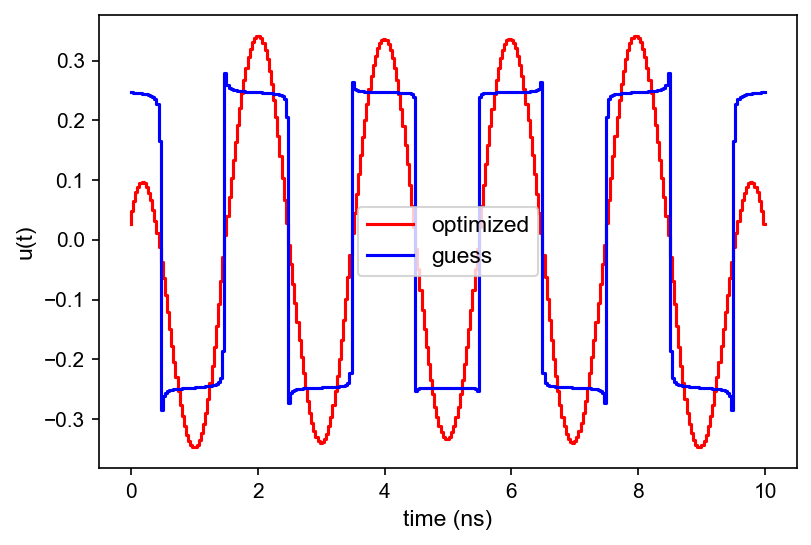

In [18]:
plot_pulses(times, initial_pulse2[0], optimized_pulse2[0])

### Control Bandwidth

It can also be helpful to consider the frequency representation of our pulse. This time we will smooth the kinks by manipulating the frequencies of the puslse rather than the aplitudes

In [19]:
def plot_fft(pulse, n):
    # calculate the list of FFT amplitudes
    fourier = np.abs(rfft(pulse))
    # create a list of frequency bins
    freq = rfftfreq(total_time_steps, total_time / total_time_steps)

    plt.stem(freq, fourier, markerfmt=" ")
    plt.ylabel("FFT Amplitude")
    plt.xlabel("frequency (1/ns)")

    # label the n most populated frequencies
    max_index = np.argpartition(abs(fourier), -n)[-n:]
    for index in max_index:
        plt.annotate("{}".format(freq[index]), xy=(freq[index], fourier[index]))

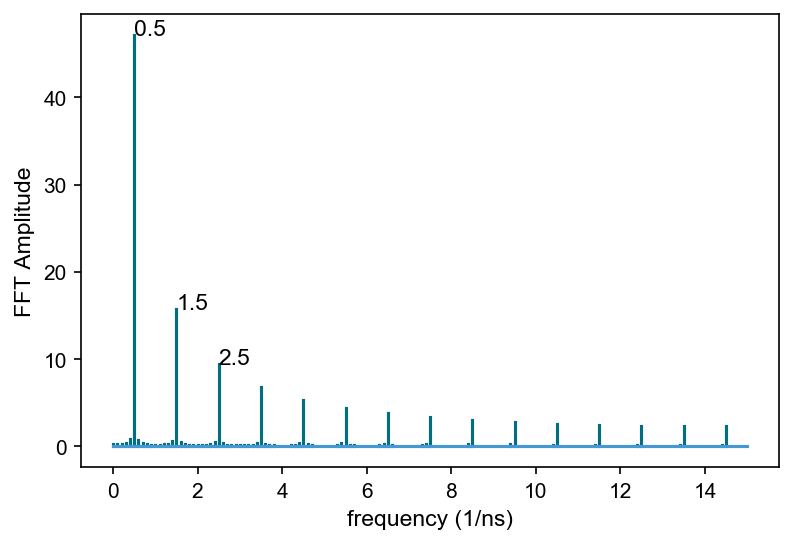

In [20]:
plot_fft(optimized_pulse1[0], 3)

To target the high frequency "kinks" we will add the ControlBandwidthMax cost contribution which penalizes frequencies above a specified cutoff frequency, "max_bandwidths".

In [21]:
from qocag import ControlBandwidthMax

 $$\large C = 1-\mathcal{F} + \alpha C_{3}(\omega_{max})$$


To remove the high frequency components, set the cuttoff frequency just above the qubit frequency of 0.5 1/ns.

In [ ]:
costs = [
    TargetStateInfidelity(target_state),
    ControlBandwidthMax(
        1,
        total_time_steps,
        total_time,
        max_bandwidths=np.array([0.5 + 0.1]),
        cost_multiplier=0.001,
    ),
]

result = grape_schroedinger_discrete(
    total_time_steps,
    costs,
    total_time,
    H0,
    h_controls,
    initial_state,
    initial_controls=initial_pulse2,
    save_file_path=save_file_path,
)

iter   |   total error  |       cost0      |       cost1      |   grads_l2  
  1    | 8.23666986e-02 |  -1.55431223e-15  |  8.23666986e-02  |  1.46458187e-01  
Iteration: 1
  2    | 8.18411758e-02 |  2.43750807e-06  |  8.18387383e-02  |  1.46493685e-01  
Iteration: 2
  3    | 8.09600552e-02 |  1.10885496e-05  |  8.09489666e-02  |  1.46542597e-01  
Iteration: 3
  4    | 8.01707162e-02 |  2.26799005e-05  |  8.01480363e-02  |  1.46589850e-01  
Iteration: 4
  5    | 7.94324614e-02 |  3.56543967e-05  |  7.93968070e-02  |  1.46634167e-01  
Iteration: 5
  6    | 7.87906721e-02 |  5.11392412e-05  |  7.87395329e-02  |  1.46680883e-01  
Iteration: 6
  7    | 7.81696584e-02 |  6.87850243e-05  |  7.81008734e-02  |  1.46728631e-01  
Iteration: 7
  8    | 7.75582770e-02 |  8.69906255e-05  |  7.74712863e-02  |  1.46776095e-01  
Iteration: 8
  9    | 7.68898862e-02 |  1.06034039e-04  |  7.67838521e-02  |  1.46821578e-01  
Iteration: 9
  10   | 7.61916545e-02 |  1.26250877e-04  |  7.60654036e-02  |  1.

  85   | 5.57680723e-02 |  1.89576195e-04  |  5.55784961e-02  |  1.46534775e-01  
Iteration: 85
  86   | 5.56089732e-02 |  1.85638657e-04  |  5.54233345e-02  |  1.46593926e-01  
Iteration: 86
  87   | 5.54625573e-02 |  1.82306987e-04  |  5.52802503e-02  |  1.46676926e-01  
Iteration: 87
  88   | 5.53073060e-02 |  1.79009509e-04  |  5.51282965e-02  |  1.46661830e-01  
Iteration: 88
  89   | 5.51567125e-02 |  1.75517344e-04  |  5.49811952e-02  |  1.46791795e-01  
Iteration: 89
  90   | 5.50095554e-02 |  1.71528076e-04  |  5.48380274e-02  |  1.46708708e-01  
Iteration: 90
  91   | 5.48402782e-02 |  1.67121690e-04  |  5.46731565e-02  |  1.46608118e-01  
Iteration: 91
  92   | 5.46719282e-02 |  1.62789264e-04  |  5.45091389e-02  |  1.46435776e-01  
Iteration: 92
  93   | 5.45253490e-02 |  1.58876704e-04  |  5.43664723e-02  |  1.46476508e-01  
Iteration: 93
  94   | 5.43598947e-02 |  1.55229723e-04  |  5.42046650e-02  |  1.46655356e-01  
Iteration: 94
  95   | 5.41971207e-02 |  1.51451177e-0

 170   | 4.22307758e-02 |  4.83202218e-05  |  4.21824555e-02  |  1.46434698e-01  
Iteration: 170
 171   | 4.20677150e-02 |  4.78838432e-05  |  4.20198312e-02  |  1.46422063e-01  
Iteration: 171
 172   | 4.18942517e-02 |  4.75457911e-05  |  4.18467059e-02  |  1.46488660e-01  
Iteration: 172
 173   | 4.17427380e-02 |  4.73047270e-05  |  4.16954333e-02  |  1.46535977e-01  
Iteration: 173
 174   | 4.15788531e-02 |  4.69333136e-05  |  4.15319198e-02  |  1.46626577e-01  
Iteration: 174
 175   | 4.14224089e-02 |  4.62393134e-05  |  4.13761696e-02  |  1.46551941e-01  
Iteration: 175
 176   | 4.12566543e-02 |  4.55896304e-05  |  4.12110647e-02  |  1.46467894e-01  
Iteration: 176
 177   | 4.10971970e-02 |  4.52084050e-05  |  4.10519886e-02  |  1.46420923e-01  
Iteration: 177
 178   | 4.09366007e-02 |  4.50988145e-05  |  4.08915019e-02  |  1.46481575e-01  
Iteration: 178
 179   | 4.07538837e-02 |  4.49978531e-05  |  4.07088859e-02  |  1.46524529e-01  
Iteration: 179
 180   | 4.05971923e-02 |  4.4

 255   | 2.82267200e-02 |  2.85863153e-05  |  2.81981337e-02  |  1.46468259e-01  
Iteration: 255
 256   | 2.80512019e-02 |  2.86208700e-05  |  2.80225810e-02  |  1.46550586e-01  
Iteration: 256
 257   | 2.78934905e-02 |  2.84333384e-05  |  2.78650571e-02  |  1.46517920e-01  
Iteration: 257
 258   | 2.77458000e-02 |  2.80900510e-05  |  2.77177100e-02  |  1.46393699e-01  
Iteration: 258
 259   | 2.75733169e-02 |  2.78805347e-05  |  2.75454364e-02  |  1.46446216e-01  
Iteration: 259
 260   | 2.73854563e-02 |  2.77762443e-05  |  2.73576800e-02  |  1.46428952e-01  
Iteration: 260
 261   | 2.72161630e-02 |  2.78471353e-05  |  2.71883158e-02  |  1.46545086e-01  
Iteration: 261
 262   | 2.70587511e-02 |  2.79172851e-05  |  2.70308338e-02  |  1.46510751e-01  
Iteration: 262
 263   | 2.69116413e-02 |  2.79662098e-05  |  2.68836751e-02  |  1.46567107e-01  
Iteration: 263
 264   | 2.67363449e-02 |  2.77662944e-05  |  2.67085786e-02  |  1.46526902e-01  
Iteration: 264
 265   | 2.65549141e-02 |  2.7

 340   | 1.62693466e-02 |  1.10810727e-05  |  1.62582655e-02  |  1.46451433e-01  
Iteration: 340
 341   | 1.61586897e-02 |  1.07622551e-05  |  1.61479274e-02  |  1.46471151e-01  
Iteration: 341
 342   | 1.60550095e-02 |  1.04271302e-05  |  1.60445823e-02  |  1.46442096e-01  
Iteration: 342
 343   | 1.59635620e-02 |  1.01398769e-05  |  1.59534222e-02  |  1.46454517e-01  
Iteration: 343
 344   | 1.58969943e-02 |  9.89258593e-06  |  1.58871017e-02  |  1.46484855e-01  
Iteration: 344
 345   | 1.58267256e-02 |  9.64627308e-06  |  1.58170793e-02  |  1.46500139e-01  
Iteration: 345
 346   | 1.57286043e-02 |  9.43064852e-06  |  1.57191737e-02  |  1.46456112e-01  
Iteration: 346
 347   | 1.56311673e-02 |  9.27665082e-06  |  1.56218907e-02  |  1.46489881e-01  
Iteration: 347
 348   | 1.55519725e-02 |  9.06754510e-06  |  1.55429049e-02  |  1.46467655e-01  
Iteration: 348
 349   | 1.54787366e-02 |  8.82414084e-06  |  1.54699125e-02  |  1.46443867e-01  
Iteration: 349
 350   | 1.54179340e-02 |  8.6

 425   | 1.08038887e-02 |  1.76879621e-06  |  1.08021199e-02  |  1.46453808e-01  
Iteration: 425
 426   | 1.07457075e-02 |  1.78857782e-06  |  1.07439189e-02  |  1.46468384e-01  
Iteration: 426
 427   | 1.07025434e-02 |  1.79539380e-06  |  1.07007480e-02  |  1.46462822e-01  
Iteration: 427
 428   | 1.06493252e-02 |  1.77473873e-06  |  1.06475504e-02  |  1.46476452e-01  
Iteration: 428
 429   | 1.06012685e-02 |  1.70897885e-06  |  1.05995595e-02  |  1.46455938e-01  
Iteration: 429
 430   | 1.05461352e-02 |  1.64979779e-06  |  1.05444854e-02  |  1.46444695e-01  
Iteration: 430
 431   | 1.04804987e-02 |  1.61568048e-06  |  1.04788830e-02  |  1.46443461e-01  
Iteration: 431
 432   | 1.04549077e-02 |  1.61455284e-06  |  1.04532932e-02  |  1.46444641e-01  
Iteration: 432
 433   | 1.03698095e-02 |  1.63612803e-06  |  1.03681734e-02  |  1.46467919e-01  
Iteration: 433
 434   | 1.03197383e-02 |  1.63927219e-06  |  1.03180990e-02  |  1.46479211e-01  
Iteration: 434
 435   | 1.03216562e-02 |  1.6

 510   | 7.54387702e-03 |  5.42942946e-07  |  7.54333408e-03  |  1.46451597e-01  
Iteration: 510
 511   | 7.49042949e-03 |  5.26212783e-07  |  7.48990327e-03  |  1.46448719e-01  
Iteration: 511
 512   | 7.44187993e-03 |  5.22148650e-07  |  7.44135778e-03  |  1.46447541e-01  
Iteration: 512
 513   | 7.41421436e-03 |  5.41298314e-07  |  7.41367306e-03  |  1.46467685e-01  
Iteration: 513
 514   | 7.38995120e-03 |  5.56462834e-07  |  7.38939474e-03  |  1.46471993e-01  
Iteration: 514
 515   | 7.34202562e-03 |  5.57926620e-07  |  7.34146769e-03  |  1.46468291e-01  
Iteration: 515
 516   | 7.30495698e-03 |  5.42476102e-07  |  7.30441451e-03  |  1.46454528e-01  
Iteration: 516
 517   | 7.26747972e-03 |  5.26237337e-07  |  7.26695348e-03  |  1.46451504e-01  
Iteration: 517
 518   | 7.23424062e-03 |  5.19453584e-07  |  7.23372116e-03  |  1.46461647e-01  
Iteration: 518
 519   | 7.20241249e-03 |  5.04967578e-07  |  7.20190752e-03  |  1.46451091e-01  
Iteration: 519
 520   | 7.15704437e-03 |  5.0

 595   | 5.21914553e-03 |  4.04302102e-07  |  5.21874123e-03  |  1.46452763e-01  
Iteration: 595
 596   | 5.21782897e-03 |  4.10846343e-07  |  5.21741812e-03  |  1.46450240e-01  
Iteration: 596
 597   | 5.19806457e-03 |  4.23274661e-07  |  5.19764129e-03  |  1.46467100e-01  
Iteration: 597
 598   | 5.16719262e-03 |  4.16136610e-07  |  5.16677648e-03  |  1.46464882e-01  
Iteration: 598
 599   | 5.15379320e-03 |  4.01231304e-07  |  5.15339196e-03  |  1.46454568e-01  
Iteration: 599
 600   | 5.14271243e-03 |  3.99796802e-07  |  5.14231263e-03  |  1.46460060e-01  
Iteration: 600
 601   | 5.10563334e-03 |  3.96661351e-07  |  5.10523668e-03  |  1.46463454e-01  
Iteration: 601
 602   | 5.07394055e-03 |  3.90889150e-07  |  5.07354966e-03  |  1.46457162e-01  
Iteration: 602
 603   | 5.06378386e-03 |  3.95439467e-07  |  5.06338842e-03  |  1.46447524e-01  
Iteration: 603
 604   | 5.07373300e-03 |  4.18568642e-07  |  5.07331443e-03  |  1.46462288e-01  
Iteration: 604
 605   | 5.04589264e-03 |  4.2

 680   | 3.67122502e-03 |  3.93090966e-07  |  3.67083193e-03  |  1.46453985e-01  
Iteration: 680
 681   | 3.67225457e-03 |  3.97040247e-07  |  3.67185753e-03  |  1.46460808e-01  
Iteration: 681
 682   | 3.65607604e-03 |  3.89781400e-07  |  3.65568626e-03  |  1.46459283e-01  
Iteration: 682
 683   | 3.61875532e-03 |  3.81871828e-07  |  3.61837345e-03  |  1.46462505e-01  
Iteration: 683
 684   | 3.58336278e-03 |  3.73594818e-07  |  3.58298919e-03  |  1.46460332e-01  
Iteration: 684
 685   | 3.58709342e-03 |  3.76046266e-07  |  3.58671737e-03  |  1.46457620e-01  
Iteration: 685
 686   | 3.58499639e-03 |  3.84427926e-07  |  3.58461196e-03  |  1.46457664e-01  
Iteration: 686
 687   | 3.55952308e-03 |  3.88333737e-07  |  3.55913475e-03  |  1.46457974e-01  
Iteration: 687
 688   | 3.51924087e-03 |  3.87139043e-07  |  3.51885373e-03  |  1.46459469e-01  
Iteration: 688
 689   | 3.50562583e-03 |  3.78425845e-07  |  3.50524740e-03  |  1.46456522e-01  
Iteration: 689
 690   | 3.49643403e-03 |  3.7

 765   | 2.10254777e-03 |  3.61311723e-07  |  2.10218646e-03  |  1.46459565e-01  
Iteration: 765
 766   | 2.07702458e-03 |  3.58695811e-07  |  2.07666588e-03  |  1.46469973e-01  
Iteration: 766
 767   | 2.08557303e-03 |  3.38423256e-07  |  2.08523460e-03  |  1.46456408e-01  
Iteration: 767
 768   | 2.05994257e-03 |  3.37478418e-07  |  2.05960509e-03  |  1.46468713e-01  
Iteration: 768
 769   | 2.03701155e-03 |  3.35285764e-07  |  2.03667626e-03  |  1.46458911e-01  
Iteration: 769
 770   | 2.01907698e-03 |  3.42511657e-07  |  2.01873447e-03  |  1.46456547e-01  
Iteration: 770
 771   | 2.01183164e-03 |  3.50561784e-07  |  2.01148108e-03  |  1.46451611e-01  
Iteration: 771
 772   | 1.97747934e-03 |  3.65368970e-07  |  1.97711397e-03  |  1.46467867e-01  
Iteration: 772
 773   | 1.96045745e-03 |  3.63897340e-07  |  1.96009356e-03  |  1.46470728e-01  
Iteration: 773
 774   | 1.94938123e-03 |  3.52907410e-07  |  1.94902832e-03  |  1.46465607e-01  
Iteration: 774
 775   | 1.91614953e-03 |  3.4

 850   | 5.88709511e-04 |  3.44213891e-07  |  5.88365297e-04  |  1.46497625e-01  
Iteration: 850
 851   | 5.72563353e-04 |  3.43347343e-07  |  5.72220005e-04  |  1.46492351e-01  
Iteration: 851
 852   | 5.41295164e-04 |  3.53932737e-07  |  5.40941231e-04  |  1.46502742e-01  
Iteration: 852
 853   | 5.21866380e-04 |  3.71654458e-07  |  5.21494726e-04  |  1.46523515e-01  
Iteration: 853
 854   | 5.05181038e-04 |  3.66345133e-07  |  5.04814693e-04  |  1.46524034e-01  
Iteration: 854
 855   | 4.95671343e-04 |  3.49145256e-07  |  4.95322198e-04  |  1.46515655e-01  
Iteration: 855
 856   | 4.83452003e-04 |  3.35908612e-07  |  4.83116095e-04  |  1.46513632e-01  
Iteration: 856
 857   | 4.63276600e-04 |  3.37012732e-07  |  4.62939587e-04  |  1.46518090e-01  
Iteration: 857
 858   | 4.44421807e-04 |  3.52101908e-07  |  4.44069705e-04  |  1.46530751e-01  
Iteration: 858
 859   | 4.21018425e-04 |  3.68798273e-07  |  4.20649627e-04  |  1.46547065e-01  
Iteration: 859
 860   | 3.94374173e-04 |  3.7

 935   | 2.72949525e-04 |  1.58273850e-08  |  2.72933698e-04  |  1.46653527e-01  
Iteration: 935
 936   | 2.74921671e-04 |  1.69532274e-08  |  2.74904717e-04  |  1.46650405e-01  
Iteration: 936
 937   | 2.73001857e-04 |  1.86603935e-08  |  2.72983196e-04  |  1.46654713e-01  
Iteration: 937
 938   | 2.76840207e-04 |  1.89449958e-08  |  2.76821262e-04  |  1.46648554e-01  
Iteration: 938
 939   | 2.68538837e-04 |  1.92775784e-08  |  2.68519559e-04  |  1.46661218e-01  
Iteration: 939
 940   | 2.80732588e-04 |  1.85101852e-08  |  2.80714077e-04  |  1.46645491e-01  
Iteration: 940
 941   | 2.82405940e-04 |  1.52933842e-08  |  2.82390647e-04  |  1.46643071e-01  
Iteration: 941
 942   | 3.03854843e-04 |  1.05261155e-08  |  3.03844317e-04  |  1.46615693e-01  
Iteration: 942
 943   | 2.93167813e-04 |  8.37708891e-09  |  2.93159436e-04  |  1.46626847e-01  
Iteration: 943
 944   | 2.67638158e-04 |  9.77450121e-09  |  2.67628384e-04  |  1.46661269e-01  
Iteration: 944
 945   | 2.60522961e-04 |  1.3

In [ ]:
optimized_pulse3, infidelity3 = result.best_controls, result.best_error
print(infidelity3)

In [ ]:
plot_pulses(times, initial_pulse2[0], optimized_pulse3[0])

In [ ]:
plot_fft(optimized_pulse3[0], 1)